### Loading/Merging Dataset For Credit Card Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as wr
wr.filterwarnings(action="ignore")
import seaborn as sns

/var/folders/m4/s489bwrx1sq_40j3_n67cl3c0000gn/T/ipykernel_30483/4062135249.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [10]:
# load data
account = pd.read_csv('/Users/ohenmaao/Desktop/SPRING 2024/archive (4)/Data/Customer Profiles/account_activity.csv')
customer = pd.read_csv('/Users/ohenmaao/Desktop/SPRING 2024/archive (4)/Data/Customer Profiles/customer_data.csv')
fraud = pd.read_csv('/Users/ohenmaao/Desktop/SPRING 2024/archive (4)/Data/Fraudulent Patterns/fraud_indicators.csv')
suspicous = pd.read_csv('/Users/ohenmaao/Desktop/SPRING 2024/archive (4)/Data/Fraudulent Patterns/suspicious_activity.csv')
merchant = pd.read_csv('/Users/ohenmaao/Desktop/SPRING 2024/archive (4)/Data/Merchant Information/merchant_data.csv')
tran_cat = pd.read_csv('/Users/ohenmaao/Desktop/SPRING 2024/archive (4)/Data/Merchant Information/transaction_category_labels.csv')
amount =  pd.read_csv('/Users/ohenmaao/Desktop/SPRING 2024/archive (4)/Data/Transaction Amounts/amount_data.csv')
tran_data = pd.read_csv('/Users/ohenmaao/Desktop/SPRING 2024/archive (4)/Data/Transaction Data/transaction_metadata.csv')
tran_rec = pd.read_csv('/Users/ohenmaao/Desktop/SPRING 2024/archive (4)/Data/Transaction Data/transaction_records.csv')

In [35]:
# merge into single dataframe
cust_data = pd.merge(account, customer, on='CustomerID')
cust_data = pd.merge(cust_data, suspicous, on='CustomerID')

transaction_data1 = pd.merge(tran_data, tran_rec, on='TransactionID')
transaction_data2 = pd.merge(anomaly, amount, on='TransactionID')
transaction_data3 = pd.merge(fraud, tran_cat, on='TransactionID')
transaction_data = pd.merge(transaction_data1, transaction_data2, on='TransactionID')
transaction_data = pd.merge(transaction_data, transaction_data3, on='TransactionID')

data = pd.merge(cust_data, transaction_data, on='CustomerID')
print(data.head())

   CustomerID  AccountBalance   LastLogin           Name  Age       Address  \
0        1001     9507.272060  2022-01-01  Customer 1001   54  Address 1001   
1        1003     1715.321989  2022-01-03  Customer 1003   40  Address 1003   
2        1004     3101.509134  2022-01-04  Customer 1004   30  Address 1004   
3        1004     3101.509134  2022-01-04  Customer 1004   30  Address 1004   
4        1005     5405.766914  2022-01-05  Customer 1005   46  Address 1005   

   SuspiciousFlag  TransactionID            Timestamp  MerchantID     Amount  \
0               0            787  2022-02-02 18:00:00        2627  33.670626   
1               0            641  2022-01-27 16:00:00        2496  30.980239   
2               0            450  2022-01-19 17:00:00        2184  11.167088   
3               0            921  2022-02-08 08:00:00        2111  45.849784   
4               0            599  2022-01-25 22:00:00        2191  81.808651   

   AnomalyScore  TransactionAmount  FraudInd

### Descriptive Statistics 

In [33]:
# count of unique customers
print(len(data['CustomerID']))

1000


In [44]:
# mean, median, mode, standard deviation, minimum and maximun of account balance 
mean = data['AccountBalance'].mean()
median = data['AccountBalance'].median()
mode = data['AccountBalance'].mode()
std = data['AccountBalance'].std()
min = data['AccountBalance'].min()
max = data['AccountBalance'].max()

print('Mean:', mean)
print('Median:', median)
print('Mode:', mode)
print('Standard Deviation:', std)
print('Minimum:', min)
print('Maximum:', max)

Mean: 5715.455930677086
Median: 5753.007775106022
Mode: 0    4344.549864
1    4886.010825
2    9674.062164
Name: AccountBalance, dtype: float64
Standard Deviation: 2540.517262483119
Minimum: 1056.301180517336
Maximum: 9999.776238940984


In [45]:
# mean, median, mode, std, range of ages
mean = data['Age'].mean()
median = data['Age'].median()
mode = data['Age'].mode()
std = data['Age'].std()
range = data['Age'].max() - data['Age'].min()

print('Mean:', mean)
print('Median:', median)
print('Mode:', mode)
print('Standard Deviation:', std)
print('Range:', range)

Mean: 39.848
Median: 39.0
Mode: 0    33
Name: Age, dtype: int64
Standard Deviation: 13.074932116452837
Range: 46


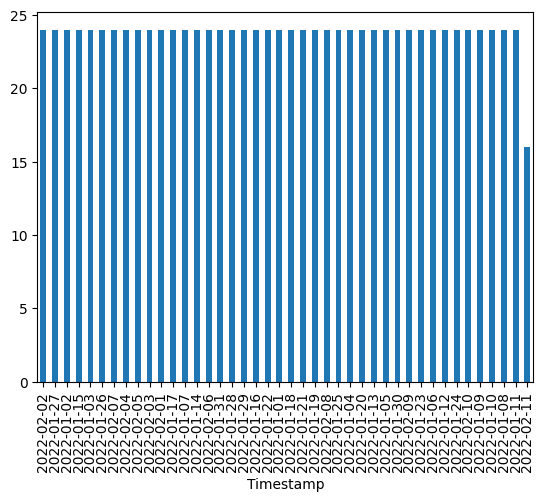

<Axes: xlabel='Timestamp'>

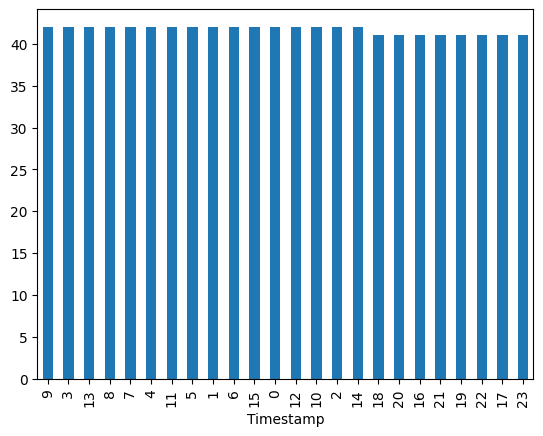

In [47]:
#distrubution aof timestamps
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Timestamp'].dt.date.value_counts().plot(kind='bar')
plt.show()

#frrequency of timestamps
data['Timestamp'].dt.hour.value_counts().plot(kind='bar')


Mean: 55.39487147053157
Median: 57.8443249636598
Mode: 0      10.006933
1      10.047488
2      10.588863
3      10.642141
4      10.661651
         ...    
995    99.719234
996    99.775358
997    99.832634
998    99.879302
999    99.887410
Name: Amount, Length: 1000, dtype: float64
Standard Deviation: 25.070809078117673
Range: 89.88047718085228


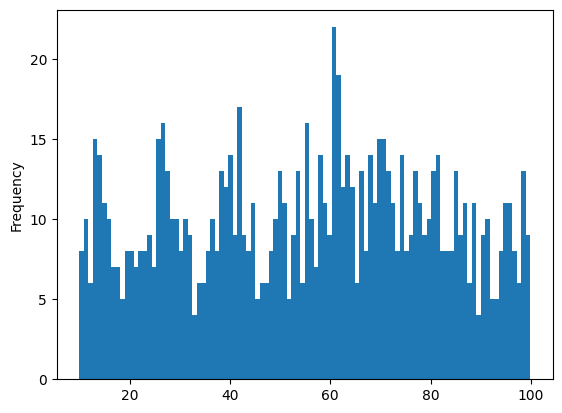

In [48]:
# mean, median, mode, std, range, and distribution of transaction amount
mean = data['Amount'].mean()
median = data['Amount'].median()
mode = data['Amount'].mode()
std = data['Amount'].std()
range = data['Amount'].max() - data['Amount'].min()

print('Mean:', mean)
print('Median:', median)
print('Mode:', mode)
print('Standard Deviation:', std)
print('Range:', range)

data['Amount'].plot(kind='hist', bins=100)
plt.show()

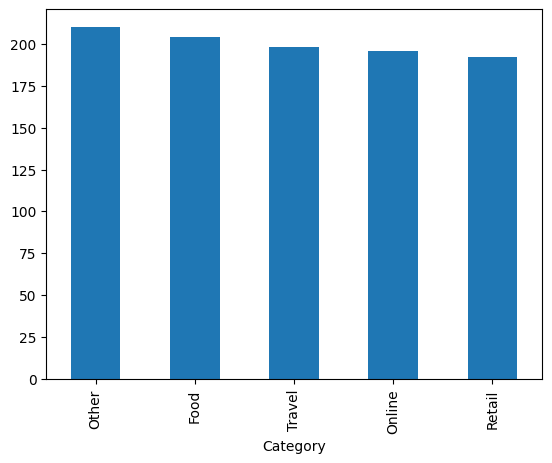

In [50]:
#frequency distrutbtion of transaction category
data['Category'].value_counts().plot(kind='bar')
plt.show()

In [53]:
#propotion of fraudulant transactions
fraud = data[data['FraudIndicator'] == 1]
non_fraud = data[data['FraudIndicator'] == 0]

fraud_prop = len(fraud) / len(data)
non_fraud_prop = len(non_fraud) / len(data)

print('Fraudulant Transactions:', fraud_prop)
print('Non-Fraudulant Transactions:', non_fraud_prop)

Fraudulant Transactions: 0.045
Non-Fraudulant Transactions: 0.955


<Axes: ylabel='Frequency'>

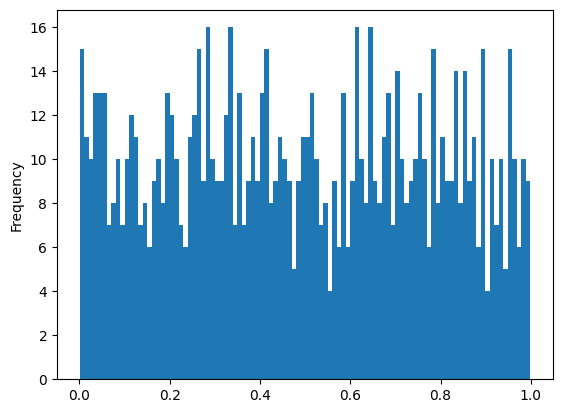

In [54]:
# distribution of anomaly scores
data['AnomalyScore'].plot(kind='hist', bins=100)


### Check for any issues with data 